<h1>The Corelation between Carbon Dioxide, Radiative Forcing, and Mean Annual Temperature:</h1>
<p>We wish to explore the relationship between global temperatures and concentrations of greenhouse gases. To accomplish this, wWe have three sets of data: the mean annual temperature data between the years 1880-2018, direct atmospheric CO2 measurements for the years 1959-2017 and the calculated global radiative forcing for CO2 and other prominent greenhouse gases.</p>

<h3>Mean Annual Temperature Anomalies</h3>
<p>The mean annual temperature anomalies are measured as local mean deviations of the average temperature over the years 1951-1980, this allows the measurement to be reasonably temperature independant, making it an ideal metric for global temperature.</p>

<h3>Annual Greenhouse Gas Index</h3>
<p>The annual greenhouse gas index (AGGI) is the calculated radiative forcing (how much thermal energy is being 'trapped' per square meter surface). Calculations of the radiative forcing are based off of the concentration of various greenhouse gases including CO2 (carbon dioxide), CH4 (methane), N2O (nitrous oxide) et al. Thus, there will be known corelation between the calculated radiative forcing and the concenctration of carbon dioxide in the atmosphere. This data is useful because it encompases the effects of other known greenhouse gasses.</p>

<h3>Atmospheric Carbon Dioxide</h3>
<p>The atmospheric carbon dioxide in ppm is a measure of the concentration of the carbon dioxide in the atmosphere. The data used here was collected from the Mauna Loa Observatory in Hawaii. Mauna Loa constitutes the longest record of direct atmospheric carbon dioxide measurements. I would like to introduce more data sources for the atmospheric concentration of carbon dioxide in the atmosphere as there are numerous probes all over the globe (see AGGI citation), but given the relative remoteness and elevation of the Mauna Loa observatory, measurements of the carbon dioxide should be more than reliable and accurate for our purposes.</p>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy import stats
%matplotlib inline

#Annual Greenhouse Gas Index
#Global Radiative Forcing 1980 - 2017 (W m-2)
aggi = pd.read_csv('noaa/AGGI_Table-1.csv')

#Atmospheric CO2 in PPM 1959-2017
co2ppm = pd.read_csv('datahub/co2-annmean-mlo_csv.csv')

#Global Mean Land-Sea Temperature 1880-2018
temp = pd.read_csv('nasa/GLB.Ts+dSST-1.csv')

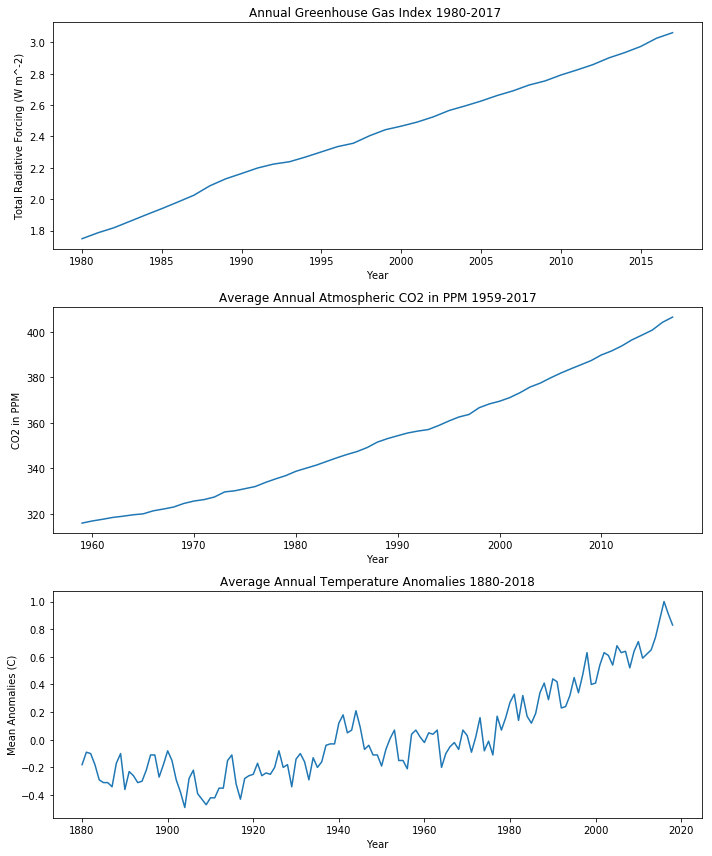

In [8]:
plt.figure(figsize = (10,12))

#Plot of Total 
plt.subplot(3,1,1)
plt.plot(aggi['Year'], aggi['Total RF'])
plt.title('Annual Greenhouse Gas Index 1980-2017 ')
plt.xlabel('Year')
plt.ylabel('Total Radiative Forcing (W m^-2)')


plt.subplot(3,1,2)
plt.plot(co2ppm['Year'], co2ppm['Mean'])
plt.title('Average Annual Atmospheric CO2 in PPM 1959-2017')
plt.xlabel('Year')
plt.ylabel('CO2 in PPM')


plt.subplot(3,1,3)
plt.plot(temp['Year'], temp['J-D'])
plt.title('Average Annual Temperature Anomalies 1880-2018')
plt.xlabel('Year')
plt.ylabel('Mean Anomalies (C)')

plt.tight_layout()
plt.show()

<h2>Observation</h2>
<p>As we can see, all three measurements have a general upward trend over their respective time ranges. The range we will be focusing on will be the years 1908-2017 over which all of our measurements overlap. We wish to answer the question: is there corelation between the atmospheric carbon dioxide concentration, the radiative forcing and the annual mean temperature anomalies?</p>

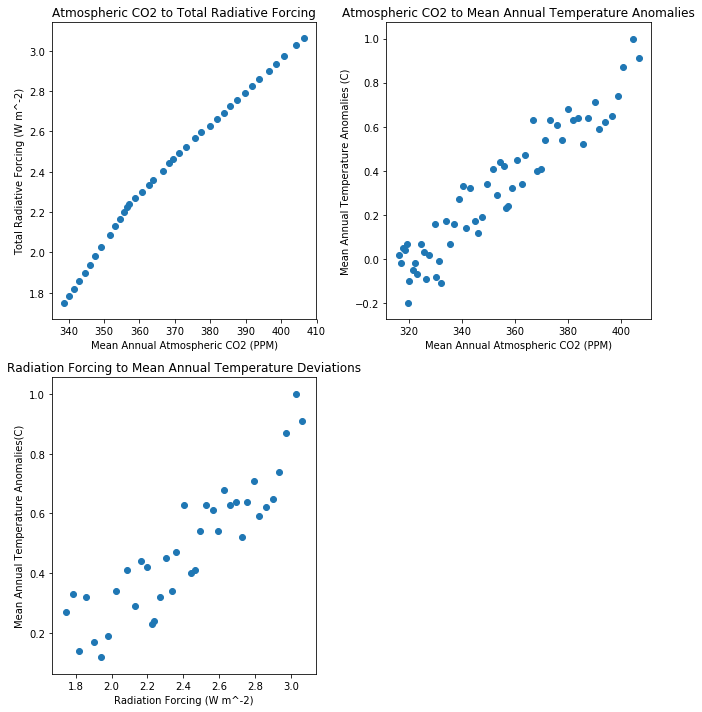

In [9]:
#Plot Total RF to CO2 in PPM for the years 1980 to 2017
aggi_join_co2 = aggi.set_index('Year').join(co2ppm.set_index('Year'))

aggi_join_temp = aggi.set_index('Year').join(temp.set_index('Year'))

co2_join_temp = co2ppm.set_index('Year').join(temp.set_index('Year'))

plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.scatter(x = aggi_join_co2['Mean'], y = aggi_join_co2['Total RF'])
plt.title('Atmospheric CO2 to Total Radiative Forcing')
plt.xlabel('Mean Annual Atmospheric CO2 (PPM)')
plt.ylabel('Total Radiative Forcing (W m^-2)')

plt.subplot(2,2,2)
plt.scatter(x = co2_join_temp['Mean'], y = co2_join_temp['J-D'])
plt.title('Atmospheric CO2 to Mean Annual Temperature Anomalies')
plt.xlabel('Mean Annual Atmospheric CO2 (PPM)')
plt.ylabel('Mean Annual Temperature Anomalies (C)')

plt.subplot(2,2,3)
plt.scatter(x = aggi_join_temp['Total RF'], y = aggi_join_temp['J-D'])
plt.title('Radiation Forcing to Mean Annual Temperature Deviations')
plt.xlabel('Radiation Forcing (W m^-2)')
plt.ylabel('Mean Annual Temperature Anomalies(C)')

plt.tight_layout()
plt.show()

<h2>Analysis</h2>
<p>Both the average annual atmospheric CO2 content and the total radiative forcing show a consistent upward trend in their respective time range. Plotting the mean anual CO2 atmospheric composition against the total radiative forcing shows an apparent linear correlation between the two. This is expected because total radiative forcing is calculated as a function of the concentration of greenhouse gasses in the atmosphere, in which carbon dioxide is the most prominent.</p>
<p>Total radiative forcing encompasses calculated radiative forcing done by other prominent greenhouse gases and thus gives us a more encompassing look at the corelation between greenhouse gases and global temperatures. However, we have around 20 years more data when we look at the relationship between the mean annual temperature anomalies and the concentration of carbon dioxide in the atmosphere. We shall perform regression analysis on both samples, determine if they are corelated and if we can reject the null hypothesis which states there is no statistically significant corelation between these two measurements.</p>

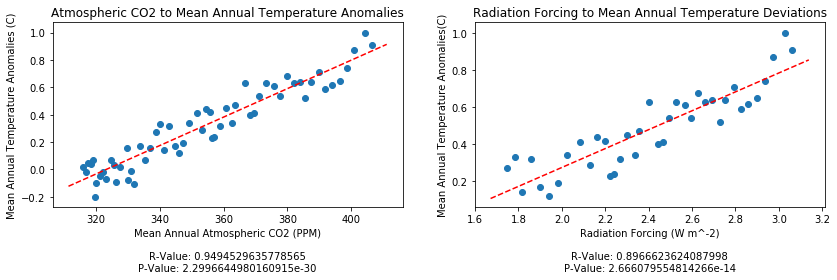

In [10]:
plt.figure(figsize=(12,4))

def draw_line(m, b, xlim, resolution): #(xmin, xmax)
    x = np.linspace(xlim[0],xlim[1],resolution)
    y = m * x + b
    plt.plot(x, y, 'r--')
    

#Relation between CO2 and mean temperature anomalies
m_1, b_1, r_value_1, p_value_1, std_err_1 = stats.linregress(x = co2_join_temp['Mean'], y = co2_join_temp['J-D'])

plt.subplot(1,2,1)

plt.scatter(x = co2_join_temp['Mean'], y = co2_join_temp['J-D'])
draw_line(m_1, b_1, plt.xlim(), 50)

plt.title('Atmospheric CO2 to Mean Annual Temperature Anomalies')
plt.xlabel('Mean Annual Atmospheric CO2 (PPM)\n\nR-Value: {}\nP-Value: {}'.format(r_value_1, p_value_1))
plt.ylabel('Mean Annual Temperature Anomalies (C)')



#Relation between calculated solar forcing and mean temperature anomalies
m_2, b_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x = aggi_join_temp['Total RF'], y = aggi_join_temp['J-D'])

plt.subplot(1,2,2)

plt.scatter(x = aggi_join_temp['Total RF'], y = aggi_join_temp['J-D'])
draw_line(m_2, b_2, plt.xlim(), 50)

plt.title('Radiation Forcing to Mean Annual Temperature Deviations')
plt.xlabel('Radiation Forcing (W m^-2)\n\nR-Value: {}\nP-Value: {}'.format(r_value_2, p_value_2))
plt.ylabel('Mean Annual Temperature Anomalies(C)')

plt.tight_layout()
plt.show()

<p>As we can see, with p-values of 2.3*10^-30 and 2.6*10^-14 respectively, we can safely reject the null hypothesis. And with r-values 0.94 and 0.89, we can describe the relationships bewtween these variables as strong and positive. And so we can say with almost absolute certainty that these measurements are corelated.</p>
<p>What follows are normalized histogram of the temperature and CO2 measurements which give us the likelyhood of randomly selecting any given measurement within the time range.</p>

<h2>Proposed Further Study</h2>
<p>I propose we use a machine learning algorithm to predict the CO2 concentrations and mean temperature anomalies. We can use similar algorithms to explore more nuances in the data when we look at shorter timespans (ie months), this would give us more data points to work with, as well as introduce more interesting features to explore, at the risk of introducing more noise in the data.</p>